In [1]:
%matplotlib inline
%pylab inline

import os
os.chdir('/home/pbreen/Desktop/word_analysis_socialmed')

from gensim.models import Word2Vec
import pandas as pd
import numpy as np

from sm_w2v.utils import (
    twts,
    len_iterable,
    cleaned_sentences_twt,
    coord_twts,
    
    )
from sm_w2v.plot_utils import (
    make_heatmap_w2vrelated,
    make_histogram,
    scikit_pca,
    plot_map,
    make_tsne_plot
    )

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Now load model
model = Word2Vec.load("sm_w2v/models_freq_tables/red.model")

# print word to vec results over all tweets for words related to 'hiv'
rel_wds = model.most_similar(positive=['hiv'], topn=10)
print('\n most similar word(s) to hiv (according to word2vec):')
print(rel_wds)


 most similar word(s) to hiv (according to word2vec):
[('hivaids', 0.8741311430931091), ('hiv…', 0.6638026237487793), ('aidshiv', 0.6236560940742493), ('syphilis', 0.5726521611213684), ('hivpositive', 0.5684381127357483), ('hepatitis', 0.5669863224029541), ('malaria', 0.5551002025604248), ('chlamydia', 0.5494667291641235), ('aids', 0.5361155271530151), ('whiv', 0.4825199842453003)]


# Do time Series

,hivaids,hiv…,aidshiv,syphilis,hivpositive,hepatitis,malaria,chlamydia,aids,whiv
date (YYYYWW),,,,,,,,,,
200901,0.000163,0.000000e+00,2.577696e-05,0.000009,6.873856e-05,0.000060,0.000043,0.000026,0.002105,0.000000e+00
200902,0.000045,0.000000e+00,0.000000e+00,0.000037,4.075727e-06,0.000024,0.000065,0.000012,0.001100,0.000000e+00
200903,0.000016,0.000000e+00,0.000000e+00,0.000036,4.023934e-06,0.000028,0.000064,0.000016,0.000829,0.000000e+00
200904,0.000041,0.000000e+00,0.000000e+00,0.000045,4.112586e-06,0.000041,0.000041,0.000016,0.001073,0.000000e+00
200905,0.000034,0.000000e+00,0.000000e+00,0.000039,8.597713e-06,0.000026,0.000039,0.000021,0.000808,0.000000e+00
200906,0.000008,0.000000e+00,0.000000e+00,0.000059,0.000000e+00,0.000017,0.000331,0.000021,0.001158,0.000000e+00
200907,0.000009,0.000000e+00,4.387119e-06,0.000044,8.774239e-06,0.000018,0.000061,0.000004,0.000930,0.000000e+00
200908,0.000017,0.000000e+00,4.264465e-06,0.000034,0.000000e+00,0.000013,0.000072,0.000009,0.000917,0.000000e+00
200909,0.000008,0.000000e+00,8.085055e-06,0.000053,4.042527e-06,0.000008,0.000073,0.000008,0.000942,0.000000e+00


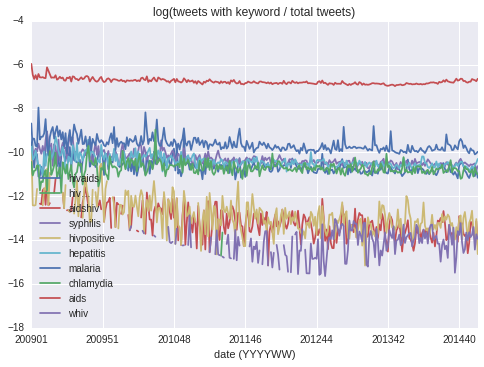

In [3]:
# display and plot
count_word_week = pd.read_csv("sm_w2v/models_freq_tables/red_hiv_wdfreq.csv",
                              index_col=0,
                             )
str_dates = [str(item) for item in count_word_week.index]
count_word_week.index = str_dates
count_word_week.index.name = "date (YYYYWW)"
display(count_word_week)
# add min and take log
count_word_week = count_word_week.apply(lambda x: np.log(x + np.min(x)))
count_word_week.plot(title="log(tweets with keyword / total tweets)")

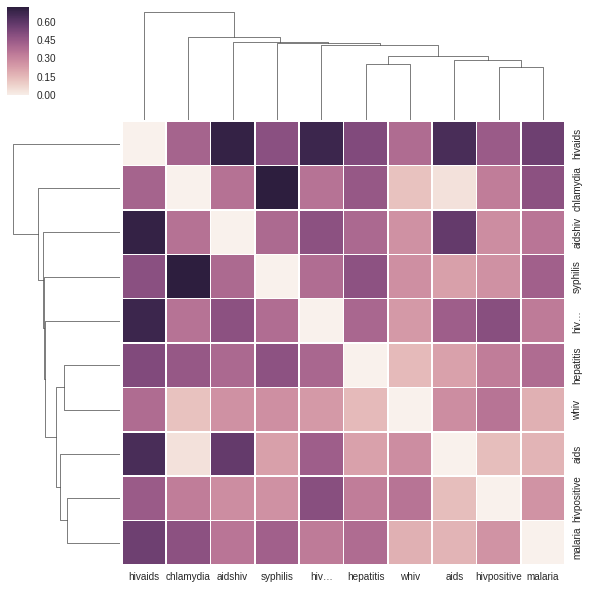

In [4]:
# make heatmap (distance between top 10 word-vectors related to 'prophylaxis'
# over all tweets)
make_heatmap_w2vrelated(model, rel_wds=rel_wds)

# Do PCA

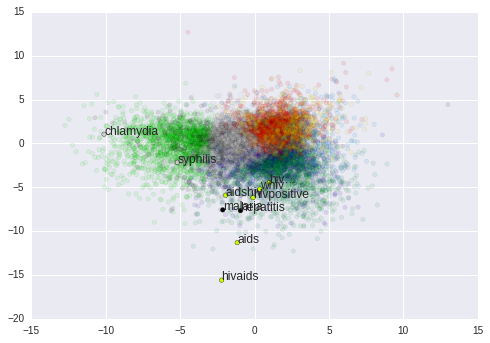

explained variance ratio: 
[ 0.0517748   0.03537987]


In [5]:
# PCA (visualization of all words in 2D)
explained_variances = scikit_pca(model, rel_wds, cluster="kmeans")
print("explained variance ratio: ")
print(explained_variances)